In [1]:
import pandas as pd

In [5]:
df_imp = pd.read_excel("Copper_Import_Forecast_2026_2027.xlsx")
df_exp = pd.read_excel("Copper_export_forecasting 2026-27.xlsx")

In [6]:
df_imp['Date'] = pd.to_datetime(df_imp['Date'])
df_imp = df_imp.set_index('Date')
df_imp = df_imp.sort_index()
# Filter for 2026 onwards
df_imp = df_imp[df_imp.index >= '2026-01-01']
df_imp = df_imp.rename(columns={'Forecasted_Value': 'Import_Forecast'})

In [7]:
df_exp = df_exp.rename(columns={'Unnamed: 0': 'Date', 'prediction': 'Export_Forecast'})
df_exp['Date'] = pd.to_datetime(df_exp['Date'])
df_exp = df_exp.set_index('Date')
df_exp = df_exp.sort_index()
# Filter for 2026 onwards (it already seems to be, but good to be safe)
df_exp = df_exp[df_exp.index >= '2026-01-01']

In [8]:
# Merge
df_gap = pd.merge(df_imp, df_exp, left_index=True, right_index=True, how='inner')

# Calculate Gap
df_gap['Net_Gap'] = df_gap['Import_Forecast'] - df_gap['Export_Forecast']
df_gap['Gap_Status'] = df_gap['Net_Gap'].apply(lambda x: 'Deficit' if x > 0 else 'Surplus')

In [10]:
df_gap.head()

,Import_Forecast,Export_Forecast,Net_Gap,Gap_Status
Date,,,,
2026-01-01,1624.670166,45.471061,1579.199105,Deficit
2026-02-01,1653.046631,34.821103,1618.225527,Deficit
2026-03-01,1685.893188,97.158588,1588.734600,Deficit
2026-04-01,1711.524292,64.754838,1646.769454,Deficit
2026-05-01,1723.765625,86.330099,1637.435526,Deficit


In [11]:
total_import_26_27 = df_gap['Import_Forecast'].sum()
total_export_26_27 = df_gap['Export_Forecast'].sum()
total_gap = df_gap['Net_Gap'].sum()
avg_monthly_gap = df_gap['Net_Gap'].mean()

print("--- Strategic Gap Metrics (2026-2027) ---")
print(f"Total Import Forecast: ${total_import_26_27:,.2f} M")
print(f"Total Export Forecast: ${total_export_26_27:,.2f} M")
print(f"Cumulative Deficit (Gap): ${total_gap:,.2f} M")
print(f"Average Monthly Deficit: ${avg_monthly_gap:,.2f} M")

--- Strategic Gap Metrics (2026-2027) ---
Total Import Forecast: $40,750.63 M
Total Export Forecast: $3,193.30 M
Cumulative Deficit (Gap): $37,557.33 M
Average Monthly Deficit: $1,707.15 M


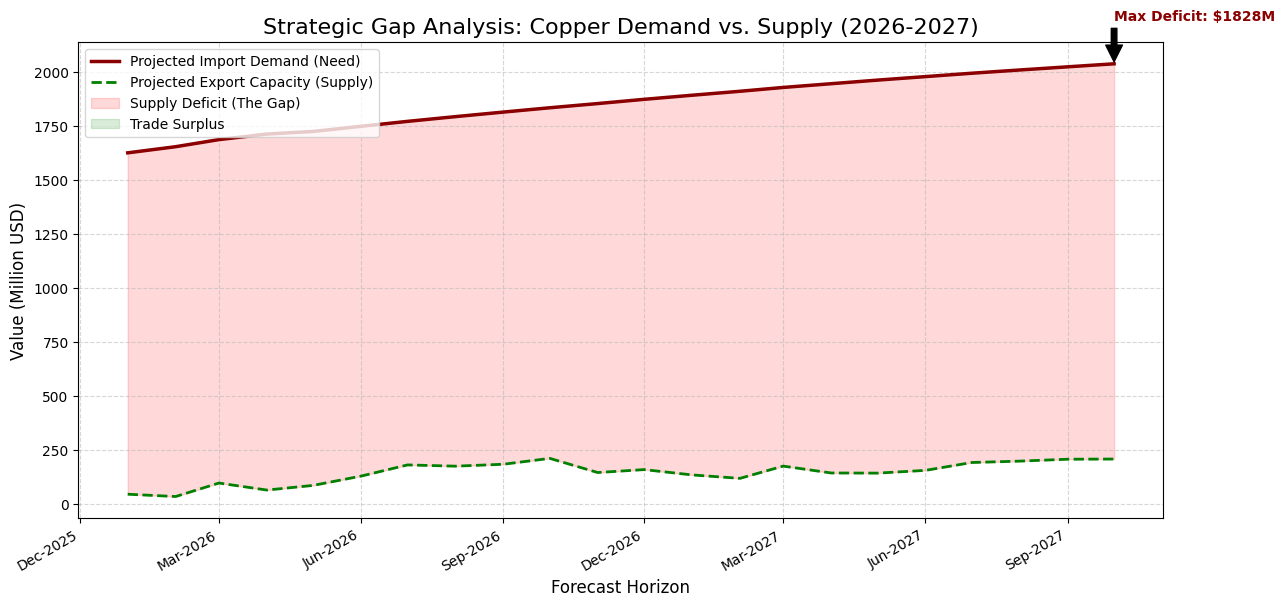

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(14, 7))

# Plot Import and Export Lines
plt.plot(df_gap.index, df_gap['Import_Forecast'], label='Projected Import Demand (Need)', color='darkred', linewidth=2.5)
plt.plot(df_gap.index, df_gap['Export_Forecast'], label='Projected Export Capacity (Supply)', color='green', linewidth=2, linestyle='--')

# Fill the Gap
plt.fill_between(df_gap.index, df_gap['Import_Forecast'], df_gap['Export_Forecast'],
                 where=(df_gap['Import_Forecast'] > df_gap['Export_Forecast']),
                 interpolate=True, color='red', alpha=0.15, label='Supply Deficit (The Gap)')

plt.fill_between(df_gap.index, df_gap['Import_Forecast'], df_gap['Export_Forecast'],
                 where=(df_gap['Import_Forecast'] <= df_gap['Export_Forecast']),
                 interpolate=True, color='green', alpha=0.15, label='Trade Surplus')

# Aesthetics
plt.title('Strategic Gap Analysis: Copper Demand vs. Supply (2026-2027)', fontsize=16)
plt.ylabel('Value (Million USD)', fontsize=12)
plt.xlabel('Forecast Horizon', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

# Annotate the max gap
max_gap_date = df_gap['Net_Gap'].idxmax()
max_gap_val = df_gap['Net_Gap'].max()
plt.annotate(f'Max Deficit: ${max_gap_val:.0f}M',
             xy=(max_gap_date, df_gap.loc[max_gap_date, 'Import_Forecast']),
             xytext=(max_gap_date, df_gap.loc[max_gap_date, 'Import_Forecast'] + 200),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, fontweight='bold', color='darkred')

# Format Dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()

# Save
# plt.savefig('Copper_Gap_Analysis_2026_27.png')
plt.show()

# Interpretation and Report Content

1. The "Asymmetric Threat"

"The Gap Analysis reveals a massive asymmetry. While our models project steady growth in demand (Import Forecast), our Export capacity remains flat and negligible. We are not just a net importer; we are structurally dependent."

2. The Financial Impact (The $37 Billion Problem)

"Our forecast predicts a Cumulative Deficit of $37.5 Billion over the next two years (2026-2027). This is not just a trade imbalance; it is a Forex Hemorrhage. On average, the Indian economy will bleed $1.7 Billion per month just to secure Copper."

3. The Widening Trend

"Observe the trajectory of the Red Line. It starts at ~$1.6B in Jan 2026 and trends upward. The 'Jaws' of the deficit are opening wider, indicating that without immediate policy intervention (e.g., recycling mandates or acquiring overseas assets), this dependency will worsen."

Strategic Recommendation:

Short Term: Secure long-term hedging contracts to lock in prices for this $37.5B requirement.

Long Term: The Green Line (Exports) is too low to ever close this gap. The only solution is Recycling (Urban Mining) to reduce the Red Line (Import Need).